---
# <center>Price differentiation strategy in the mobile phone market.</center> 
---


[1. PREPARATION AND VERIFICATION OF THE RECEIVED DATA.](#R1)  
[2. DATA ANALYSIS:](#R2)
- [NUMBER OF DEVICES IN INDIVIDUAL PRICE RANGES](#R3)
- [RAM](#R4)
- [DISPLAY SCREEN RESOLUTION](#R5)
- [DISPLAY SCREEN SIZE](#R6)
- [CAMERA RESOLUTION](#R7)
- [INTERNAL MEMORY SIZE](#R8)
- [CPU SPEED](#R9)
- [CPU CORES](#R10)
- [WEIGHT](#R11)
- [BATTERY CAPACITY](#R12)
- [PHONE THICKNESS](#R13)
- [MAXIMUM RUNNING TIME OF THE PHONE DURING A CALL](#R14)
- [PHONE FUNCTIONS RELATED TO CATEGORIAL DATA](#R15)  

[3. CONCLUSIONS](#R16)

### <a id = "R1">1. PREPARATION AND VERIFICATION OF THE RECEIVED DATA.</a>

In [1]:
# import of libraries and loading data from a file
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize']=(18,10)

In [3]:
phone_data = pd.read_csv('mobile-price-classification_train.csv')

In [4]:
# checking the correctness of data loading
phone_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# checking if there are cells with no data
phone_data.isnull().sum()
# THERE ARE NO DATA GAPS

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
# checking for duplicate data
sum(phone_data.duplicated())
# THERE ARE NO DUPLICATES IN THE DATA

0

In [7]:
# display the type of data used
phone_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [8]:
# display basic information about the data
phone_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
phone_data['Screen_size'] = [x for x in round((phone_data.sc_h**2 + phone_data.sc_w**2)/25,1)] # screen size in inches
phone_data['Screen_matrix'] = [x for x in (phone_data.px_height * phone_data.px_width)] # matrix resolution in pixels

In [10]:
phone_data.loc[(phone_data.sc_h/phone_data.sc_w)>2].shape[0]
# 1,034 records with displays that are absent on the market - 51.7% of all records

1034

In [11]:
phone_data.loc[(phone_data.sc_w==0) | (phone_data.sc_h==0)].shape[0]
# 180 records with 0 display width !!!!!

180

In [12]:
phone_data.loc[(phone_data.px_height==0) | (phone_data.px_height==0)]
# 2 records with 0 resolution !!!!!

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Screen_size,Screen_matrix
1481,1834,0,2.1,0,7,1,40,0.1,99,4,...,3692,13,0,16,1,1,0,3,6.8,0
1933,897,1,2.0,0,3,1,2,0.6,154,8,...,1958,7,5,7,1,1,0,1,3.0,0


In [13]:
smartphone = phone_data.loc[(phone_data.Screen_size)<7]
tablet = phone_data.loc[(phone_data.Screen_size)>=7]
# 892 records with data corresponding to devices known as smartphones
# 1108 records with data / parameters corresponding to devices referred to as a tablet

### <center>Opis analizowanych danych</center>
<table>
    <tr><td><b>Data</b></td><td><center><b>Feature of the phone</b></center></td></tr>
<tr><td><b><font color="blue">battery_power</font></b></td><td>Total energy that a battery can store at any one time [mAh] </td></tr>
<tr><td><b><font color="blue">blue</font></b></td><td>Bluetooth Yes / No</td></tr>
<tr><td><b><font color="blue">clock_speed</font></b></td><td> the speed at which the microprocessor executes instructions  </td></tr>
<tr><td><b><font color="blue">dual_sim</font></b></td><td> dual SIM support Yes / No </td></tr>
<tr><td><b><font color="blue">fc</font></b></td><td> Front camera mega pixels  </td></tr>
<tr><td><b><font color="blue">four_g</font></b></td><td> 4G Yes / No  </td></tr>
<tr><td><b><font color="blue">int_memory</font></b></td><td> Internal memory in gigabytes  </td></tr>
<tr><td><b><font color="blue">m_dep</font></b></td><td> Cell thickness [cm]  </td></tr>
<tr><td><b><font color="blue">mobile_wt</font></b></td><td> Weight of the mobile phone  </td></tr>
<tr><td><b><font color="blue">n_cores</font></b></td><td> The number of processor cores  </td></tr>
<tr><td><b><font color="blue">pc</font></b></td><td> Mega pixels of the primary camera  </td></tr>
<tr><td><b><font color="blue">px_height</font></b></td><td> Pixel resolution height  </td></tr>
<tr><td><b><font color="blue">px_width</font></b></td><td> Pixel resolution width  </td></tr>
<tr><td><b><font color="blue">ram</font></b></td><td> RAM [MB]  </td></tr>
<tr><td><b><font color="blue">sc_h</font></b></td><td> Screen height [cm]  </td></tr>
<tr><td><b><font color="blue">sc_w</font></b></td><td> Screen width [cm]  </td></tr>
<tr><td><b><font color="blue">talk_time</font></b></td><td> The maximum operating time of the phone during a call  </td></tr>
<tr><td><b><font color="blue">three_g</font></b></td><td> 3G Yes / No  </td></tr>
<tr><td><b><font color="blue">touch_screen</font></b></td><td> Touchscreen Yes / No  </td></tr>
<tr><td><b><font color="blue">wifi</font></b></td><td> WiFi Yes / No  </td></tr>
<tr><td><b><font color="blue">price_range</font></b></td><td> Explained variable: 0 (low price), 1 (average price), 2 (high price), 3 (very high price).</td></tr>
</table>

In [14]:
# breakdown of data for further use
bool_data = phone_data[['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']]
bool_data_col = ['blue','dual_sim','four_g','three_g','touch_screen','wifi']
categorical_data = phone_data.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi'], axis=1)

### <a id = "R2">2. DATA ANALYSIS.</a>

#### Influence of the installed components in the phone on its price.

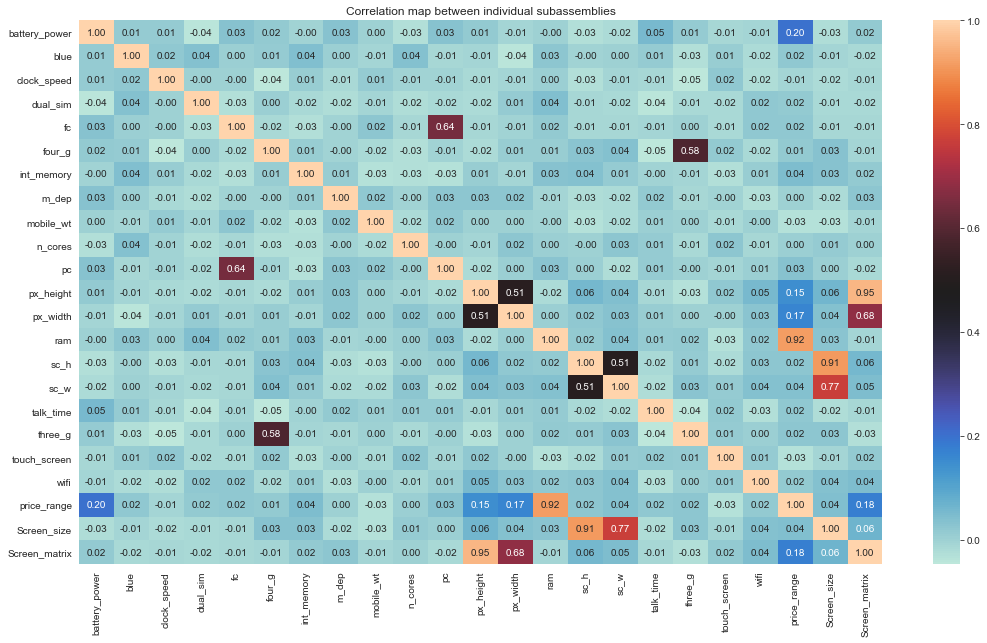

In [15]:
# Pearson corr
plt.title('Correlation map between individual subassemblies')
g = sns.heatmap(phone_data.corr(), cmap = "icefire", fmt='.2f', annot = True)

The greatest correlation of **price_range** of a phone refers to the amount of **RAM** installed in the device.  
The total battery energy also has a minor impact on the price of the device.   
It should also be emphasized that there is a moderate relationship between such features as:
- camera matrix resolution (primary and front),
- possibility to work in 3G/4G technology,
- Screen_matrix (px_height, px_width),
- Screen_Size (sc_h, sc_w).

### <a id = "R3">NUMBER OF DEVICES IN INDIVIDUAL PRICE RANGES</a>

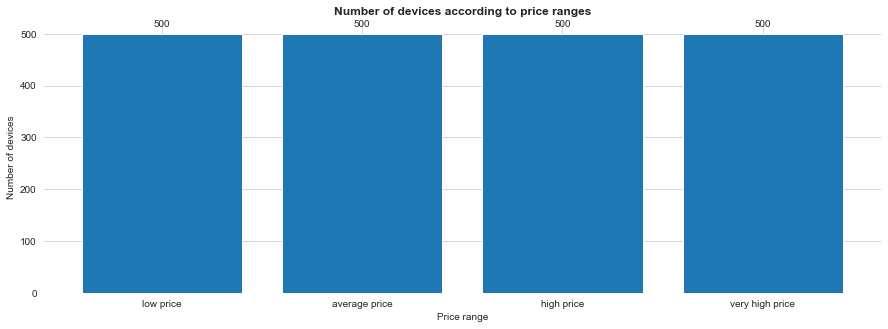

In [16]:
# 0 (low price), 1 (average price), 2 (high price), 3 (very high price).
fig, ax = plt.subplots(1, 1, figsize=(15,5))    
x = phone_data.price_range.unique().tolist()
x.sort()
y = phone_data.price_range.value_counts()[x]
# Create a bar chart
ax.bar(x,y)
ax.set_xticks(x)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i in x:
    ax.annotate(y[i], (x[i], y[i]), # coordinates and values
                ha='center', va='center', # the relative position of the labels relative to the point
                xytext=(0, 10), textcoords='offset points')
plt.xlabel('Price range')
plt.xticks(range(0,4),labels=['low price', 'average price', 'high price', 'very high price'])
plt.ylabel('Number of devices')
plt.title('Number of devices according to price ranges',loc='center',fontweight='bold')    
plt.show()

**The number of phones in each price range is even - 500 phones for each range.**

### <a id = "R4">RAM</a>

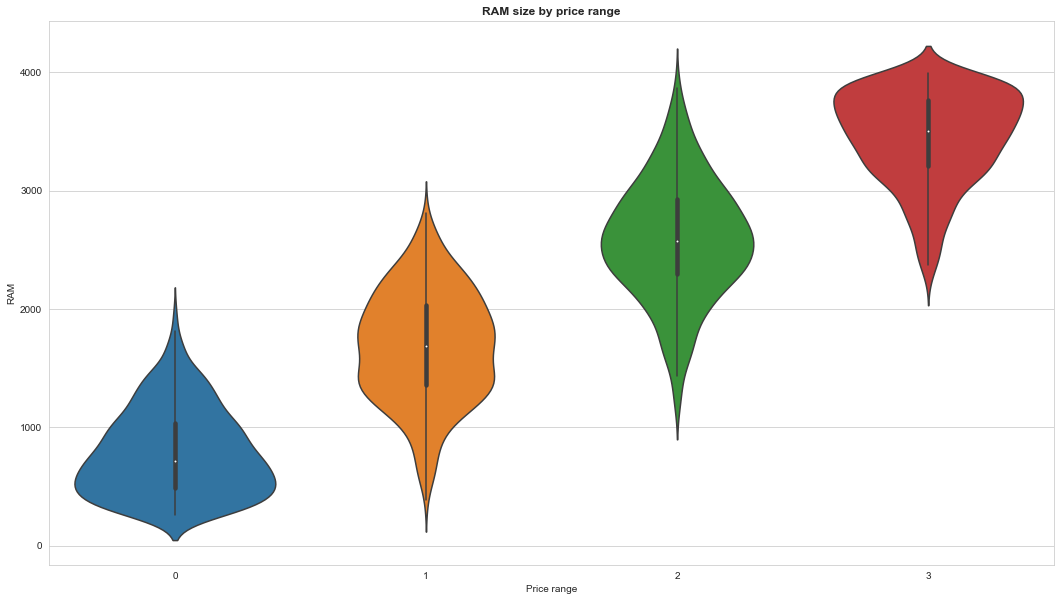

In [17]:
sns.violinplot(phone_data.price_range,phone_data.ram)
plt.xlabel('Price range')
plt.ylabel('RAM')
plt.title('RAM size by price range',loc='center',fontweight='bold') 
plt.show()

**The size of the installed RAM in the phone has a big impact on its price.**

### <a id = "R5">DISPLAY SCREEN RESOLUTION</a>

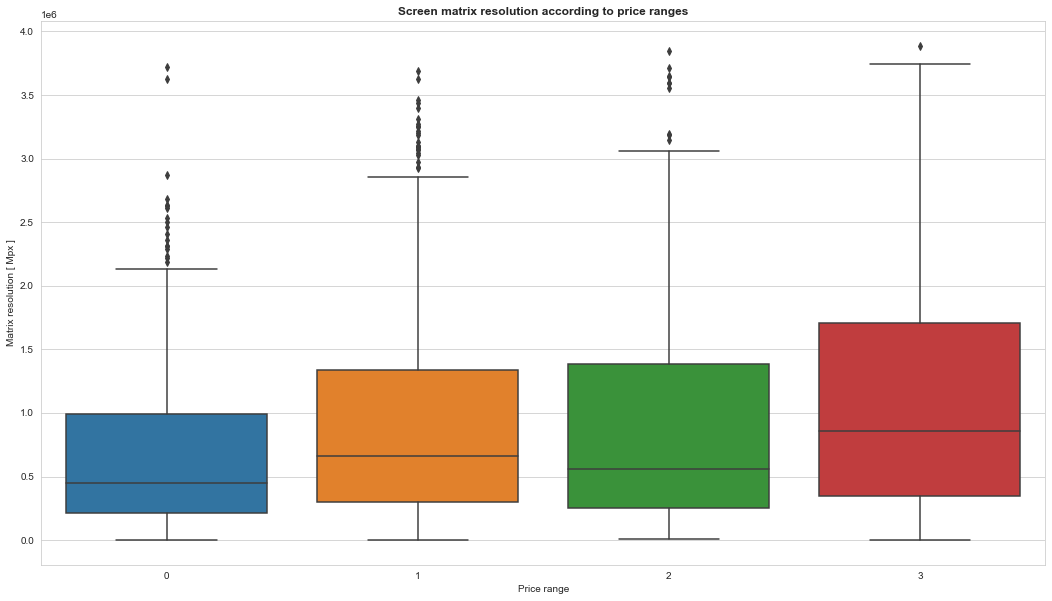

In [18]:
sns.boxplot(x=phone_data.price_range,y=phone_data.Screen_matrix)
plt.xlabel('Price range')
plt.ylabel('Matrix resolution [ Mpx ]')
plt.title('Screen matrix resolution according to price ranges',loc='center',fontweight='bold') 
plt.show()

**There are large inaccuracies in the data regarding the matrix resolution, which proves that the data in the device specifications are incorrect.**

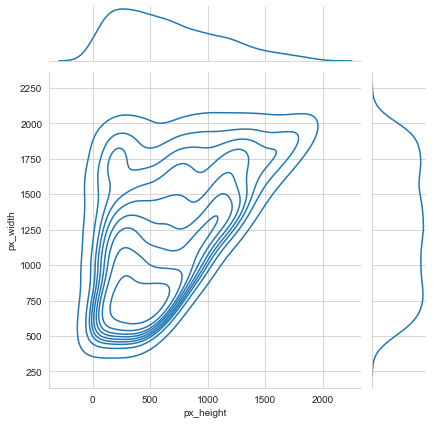

In [19]:
sns.jointplot(x=phone_data.px_height, y=phone_data.px_width, kind="kde")
plt.show()

**Values of px_width> 500 and px_height near 0 indicate data set errors.  
Displays with such matrix sizes are not available on the mobile phone market.**

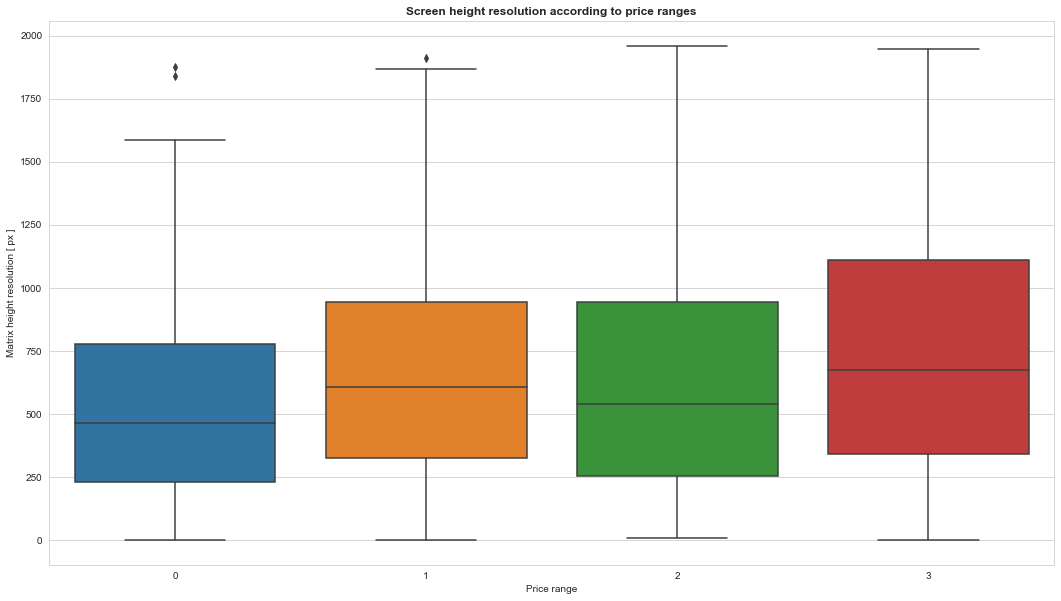

In [20]:
sns.boxplot(x= phone_data.price_range,y=phone_data.px_height)
plt.xlabel('Price range')
plt.ylabel('Matrix height resolution [ px ]')
plt.title('Screen height resolution according to price ranges',loc='center',fontweight='bold') 
plt.show()

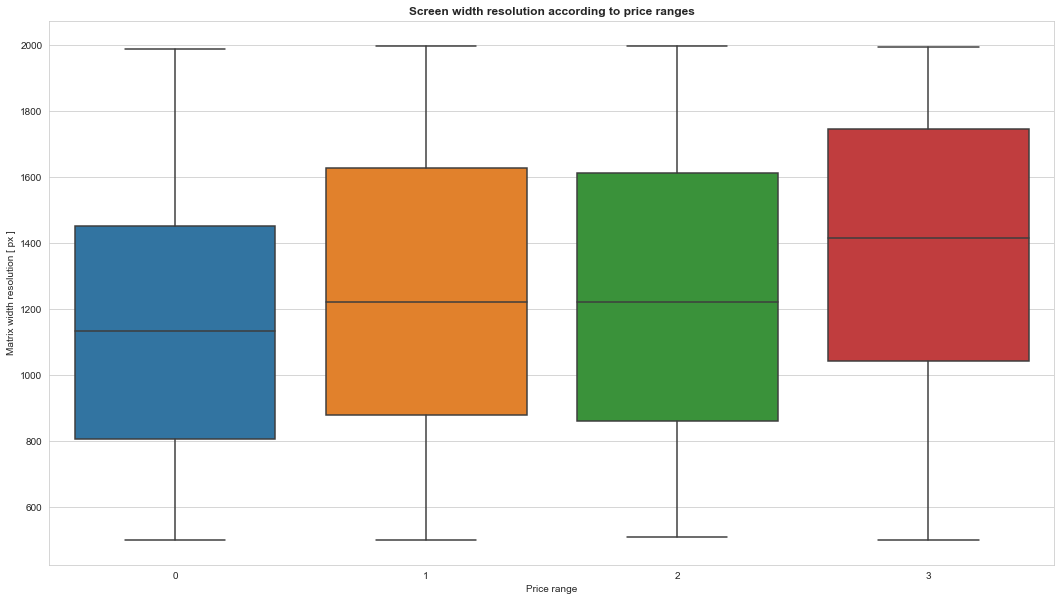

In [21]:
sns.boxplot(x= phone_data.price_range,y=phone_data.px_width)
plt.xlabel('Price range')
plt.ylabel('Matrix width resolution [ px ]')
plt.title('Screen width resolution according to price ranges',loc='center',fontweight='bold') 
plt.show()

### <a id = "R6">DISPLAY SCREEN SIZE</a>

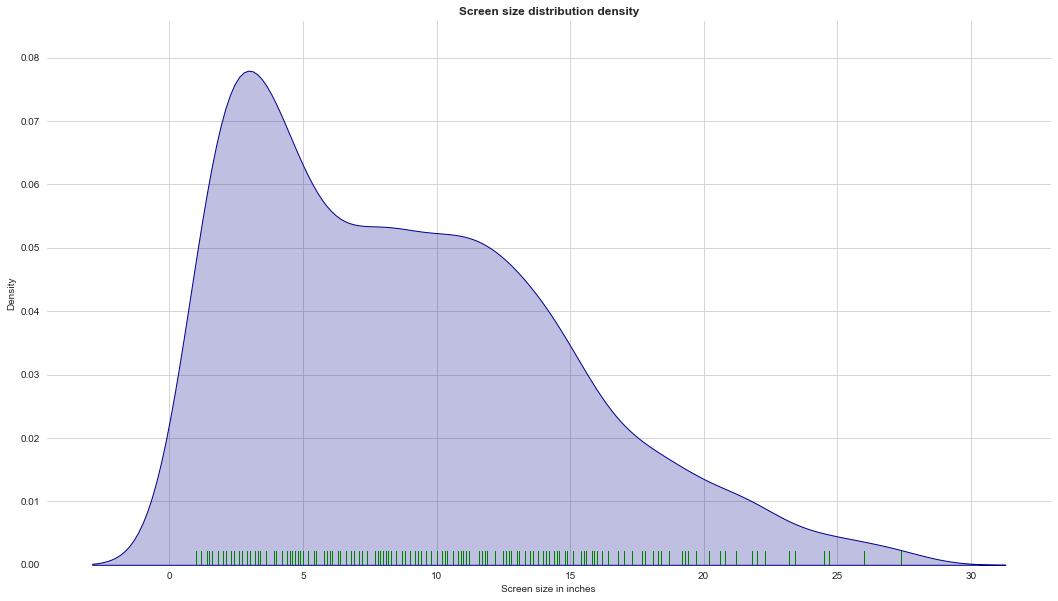

In [22]:
sns.distplot(phone_data.Screen_size, rug=True, rug_kws={"color": "g"},hist=False, color="darkblue", label='phone_data', kde_kws={"shade": True})
sns.despine(left=True, bottom=True)
plt.xlabel('Screen size in inches')
plt.title('Screen size distribution density',loc='center',fontweight='bold')
plt.show()

**Devices with a screen greater than 7 "should be considered tablets or phablets.**

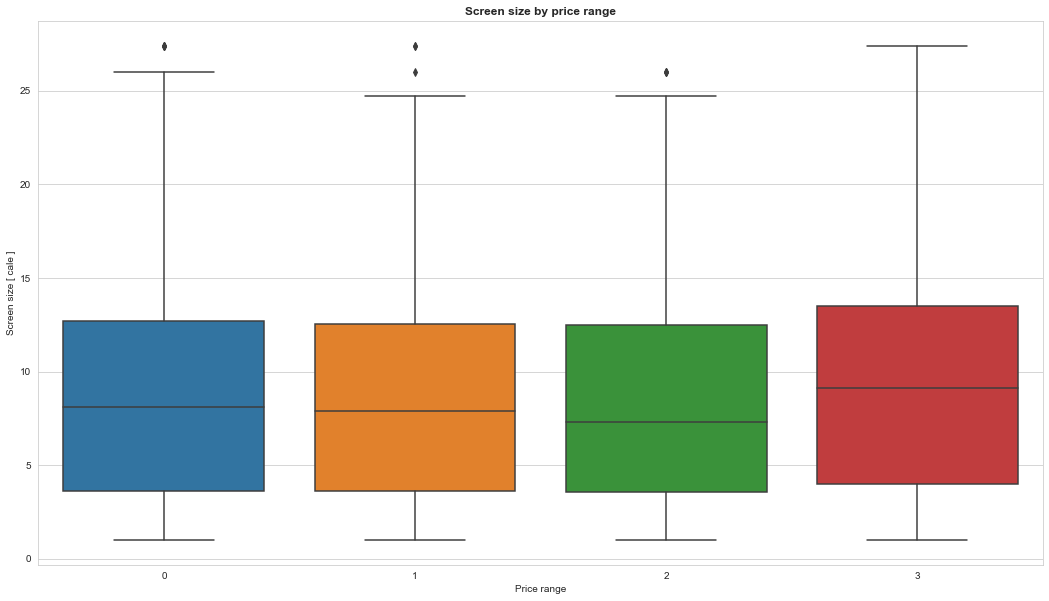

In [23]:
sns.boxplot(phone_data.price_range,phone_data.Screen_size)
plt.xlabel('Price range')
plt.ylabel('Screen size [ cale ]')
plt.title('Screen size by price range',loc='center',fontweight='bold') 
plt.show()

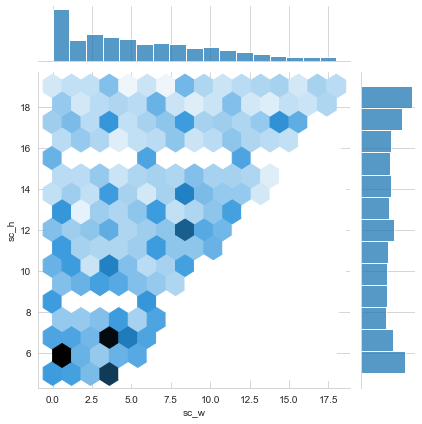

In [24]:
sns.jointplot(x=phone_data.sc_w, y=phone_data.sc_h, kind="hex")
plt.show()

**A screen width of 0 cm and a screen height of 18 cm may indicate incorrect data in the specification.**

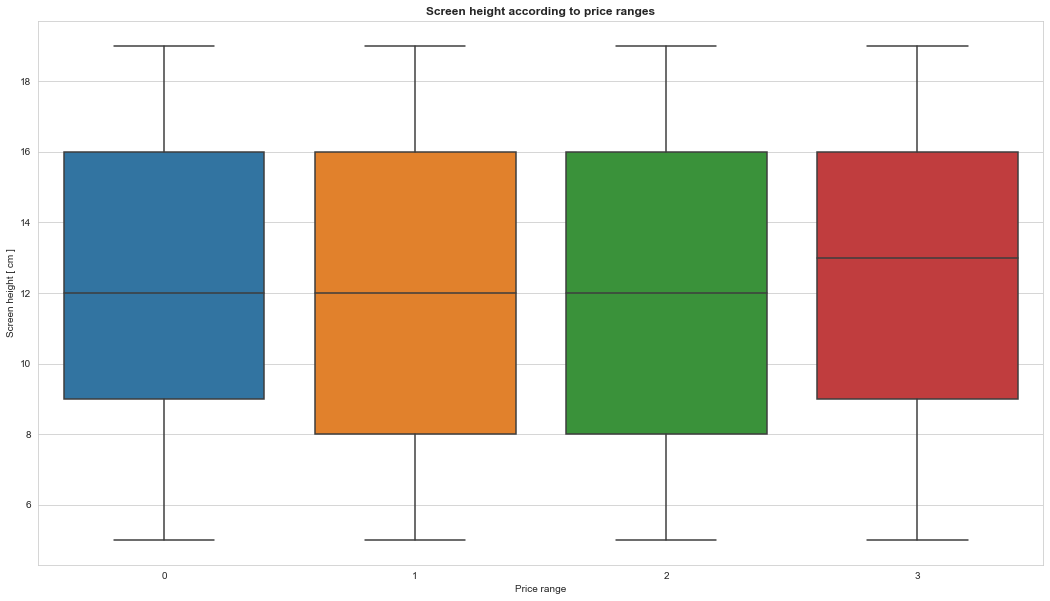

In [25]:
sns.boxplot(phone_data.price_range,phone_data.sc_h)
plt.xlabel('Price range')
plt.ylabel('Screen height [ cm ]')
plt.title('Screen height according to price ranges',loc='center',fontweight='bold') 
plt.show()

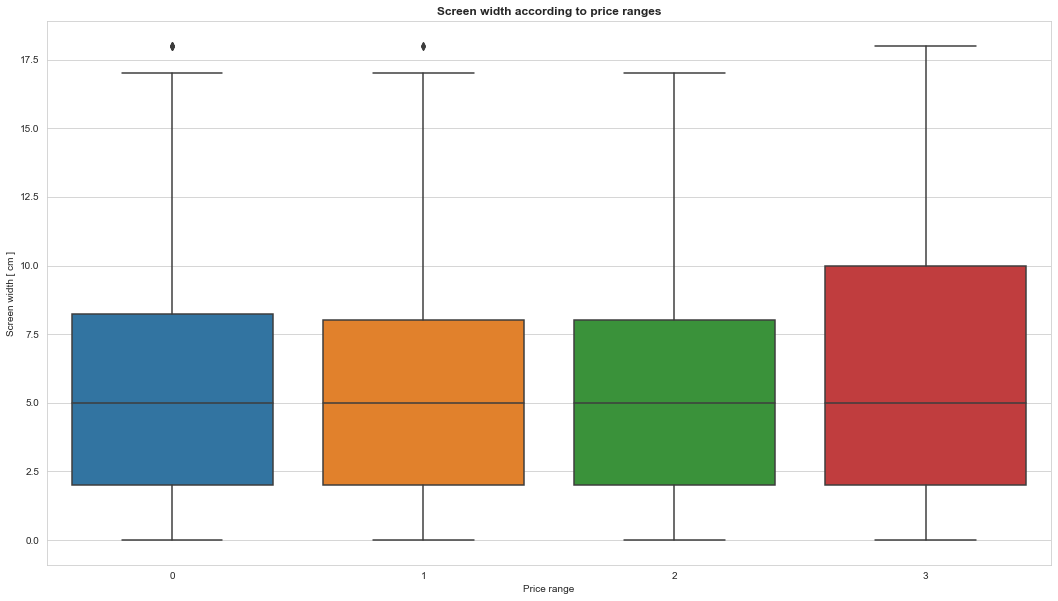

In [26]:
sns.boxplot(phone_data.price_range,phone_data.sc_w)
plt.xlabel('Price range')
plt.ylabel('Screen width [ cm ]')
plt.title('Screen width according to price ranges',loc='center',fontweight='bold') 
plt.show()

### <a id = "R7">CAMERA RESOLUTION</a>

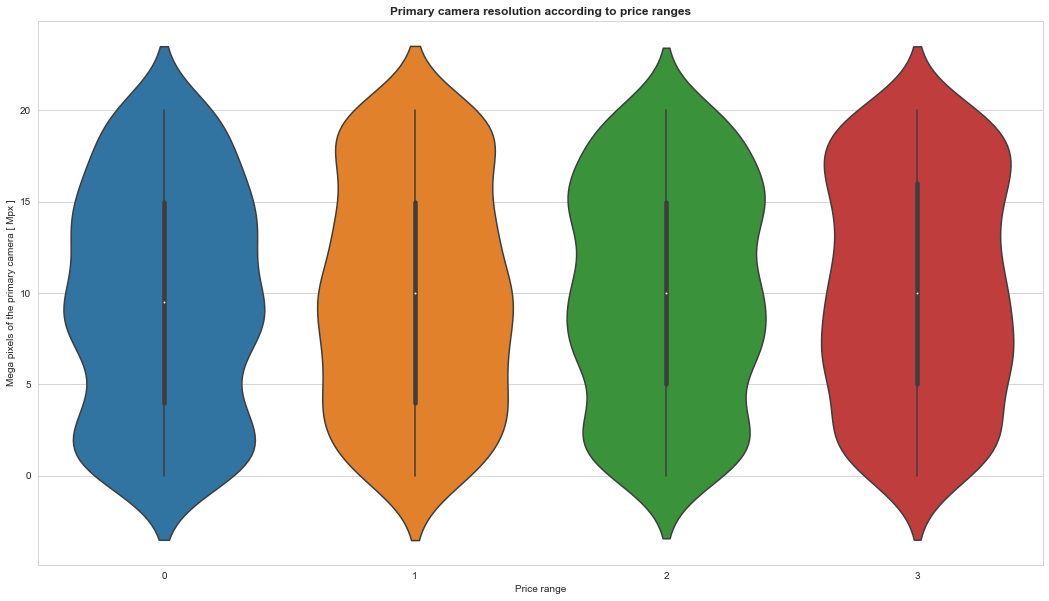

In [27]:
sns.violinplot(phone_data.price_range,phone_data.pc)
plt.xlabel('Price range')
plt.ylabel('Mega pixels of the primary camera [ Mpx ]')
plt.title('Primary camera resolution according to price ranges',loc='center',fontweight='bold') 
plt.show()

**The resolution of the primary camera does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

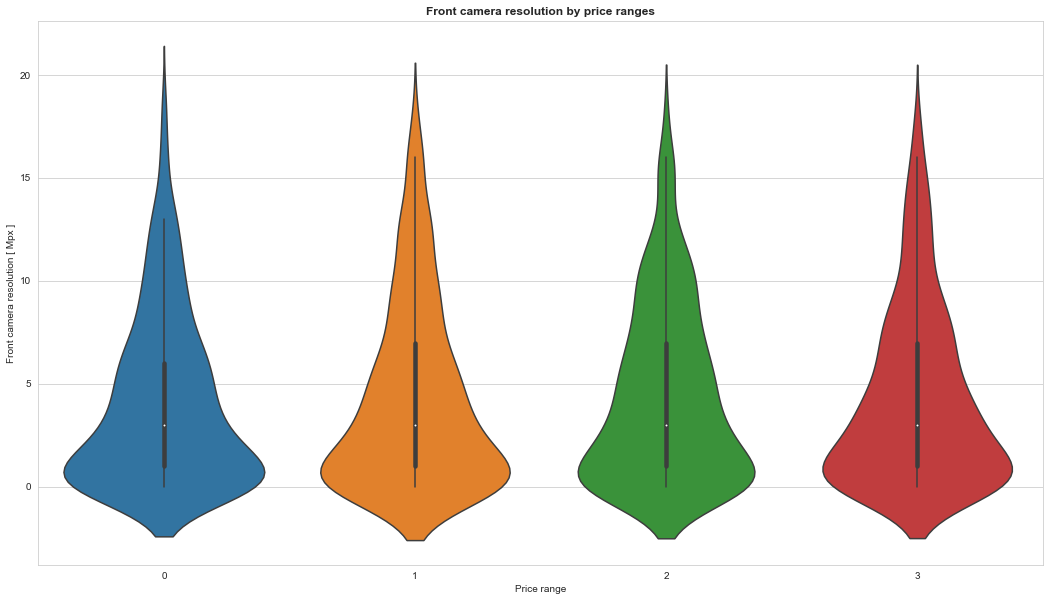

In [28]:
sns.violinplot(phone_data.price_range,phone_data.fc)
plt.xlabel('Price range')
plt.ylabel('Front camera resolution [ Mpx ]')
plt.title('Front camera resolution by price ranges',loc='center',fontweight='bold') 
plt.show()

**The resolution of the front camera does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R8">INTERNAL MEMORY SIZE</a>

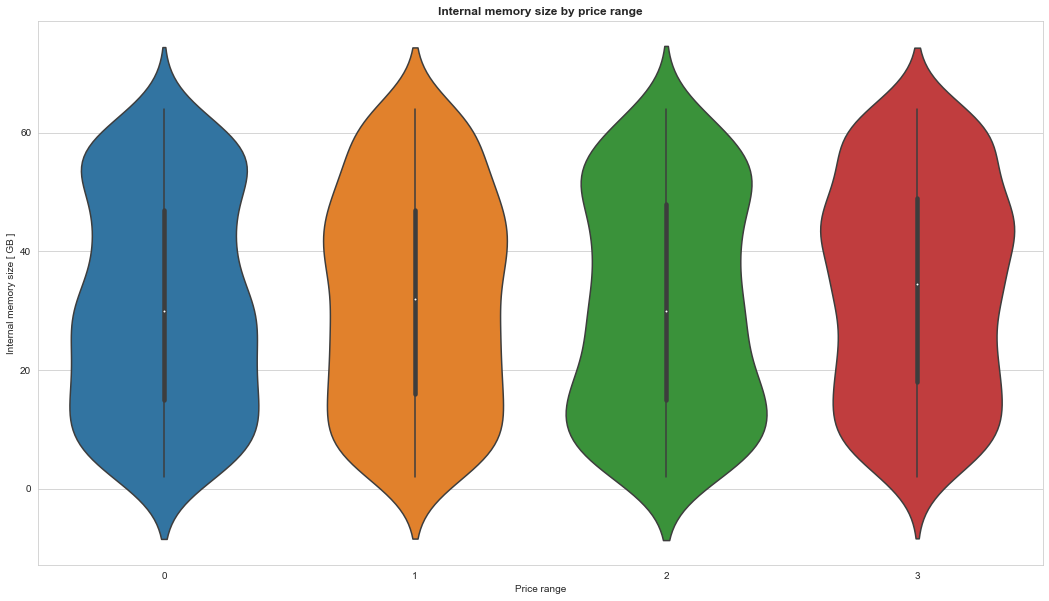

In [29]:
sns.violinplot(phone_data.price_range,phone_data.int_memory)
plt.xlabel('Price range')
plt.ylabel('Internal memory size [ GB ]')
plt.title('Internal memory size by price range',loc='center',fontweight='bold') 
plt.show()

**The size of the internal memory does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R9">CPU SPEED</a>

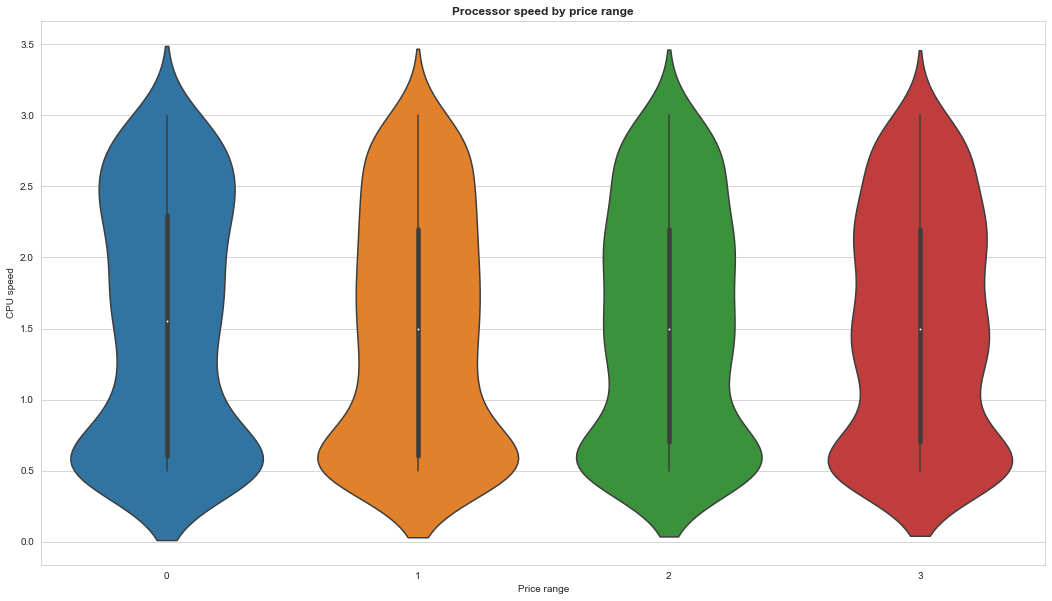

In [30]:
sns.violinplot(phone_data.price_range,phone_data.clock_speed)
plt.xlabel('Price range')
plt.ylabel('CPU speed')
plt.title('Processor speed by price range',loc='center',fontweight='bold') 
plt.show()

**The speed of the processor does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R10">CPU CORES</a>

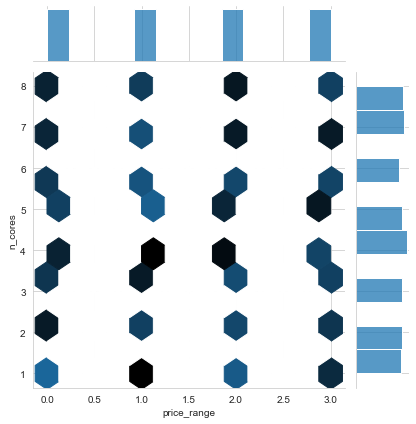

In [31]:
sns.jointplot(phone_data.price_range, phone_data.n_cores, kind='hex')
plt.show()

**The number of processor cores does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R11">WEIGHT</a>

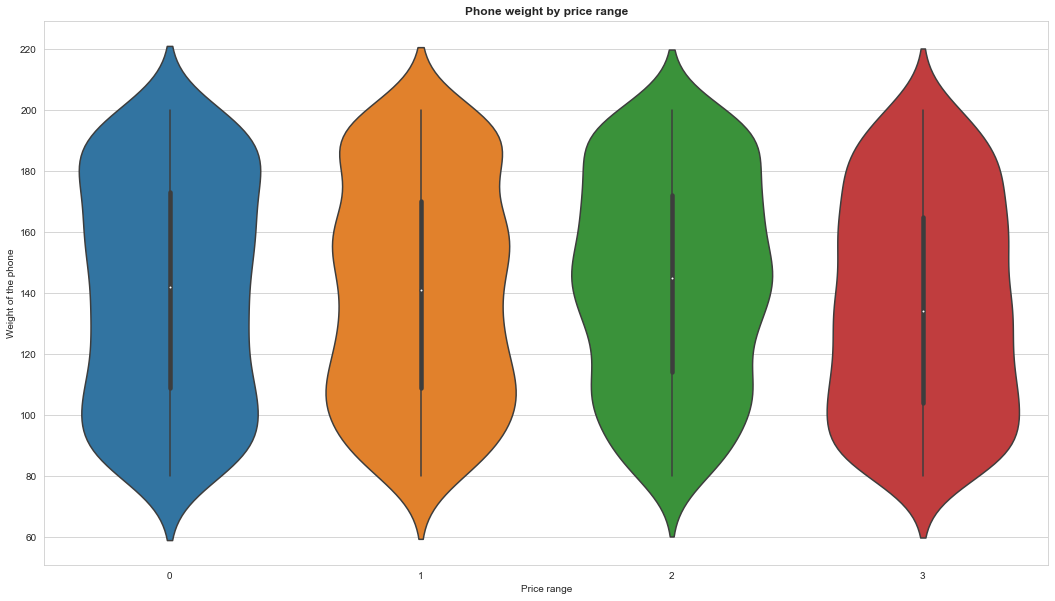

In [32]:
sns.violinplot(phone_data.price_range,phone_data.mobile_wt)
plt.xlabel('Price range')
plt.ylabel('Weight of the phone')
plt.title('Phone weight by price range',loc='center',fontweight='bold') 
plt.show()

**The weight of the device does not have a significant impact on the price of the phone, as there is a similar distribution in each price range.**

### <a id = "R12">BATTERY CAPACITY</a>

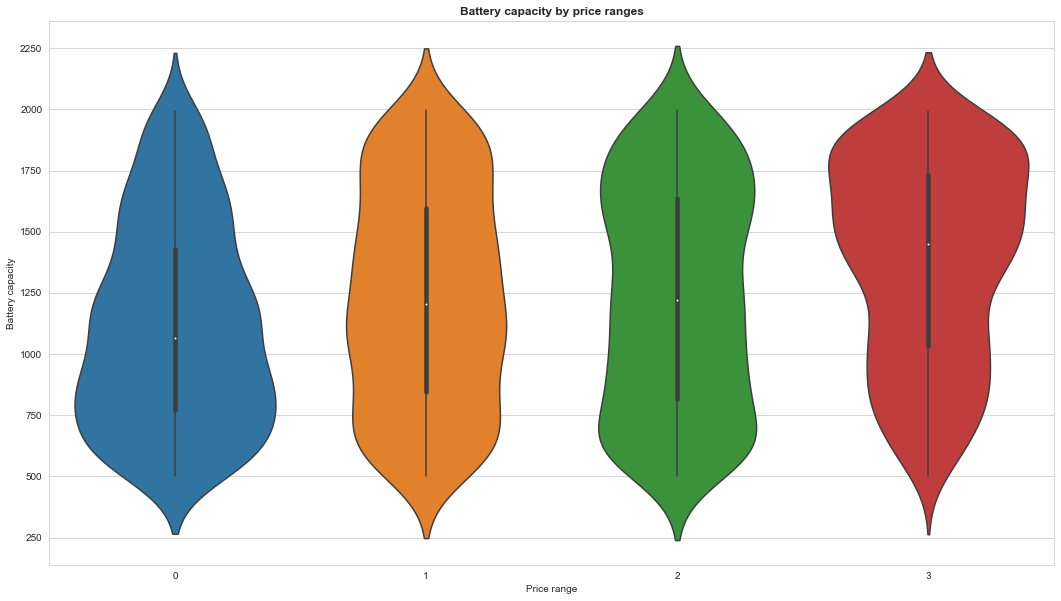

In [33]:
sns.violinplot(phone_data.price_range,phone_data.battery_power)
plt.xlabel('Price range')
plt.ylabel('Battery capacity')
plt.title('Battery capacity by price ranges',loc='center',fontweight='bold') 
plt.show()

**The higher capacity of the phone battery occurs in more devices in the 3rd price range. Median: 0 - 1066, 1 - 1206, 2 - 1219.5, 3 - 1449.5**

### <a id = "R13">PHONE THICKNESS</a>

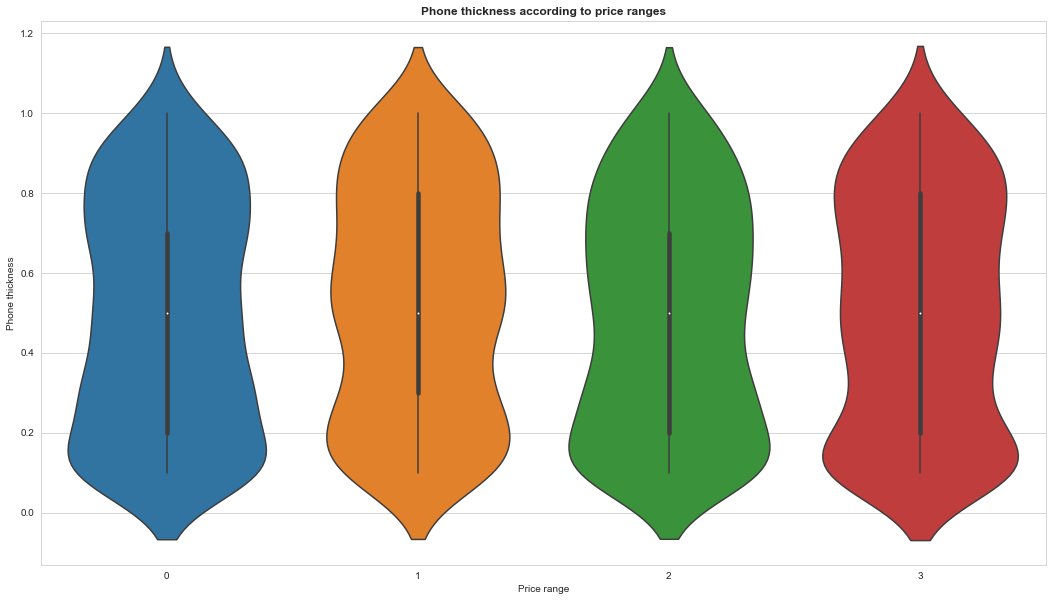

In [34]:
sns.violinplot(phone_data.price_range,phone_data.m_dep)
plt.xlabel('Price range')
plt.ylabel('Phone thickness')
plt.title('Phone thickness according to price ranges',loc='center',fontweight='bold') 
plt.show()

**The thickness does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R14">MAXIMUM RUNNING TIME OF THE PHONE DURING A CALL</a>

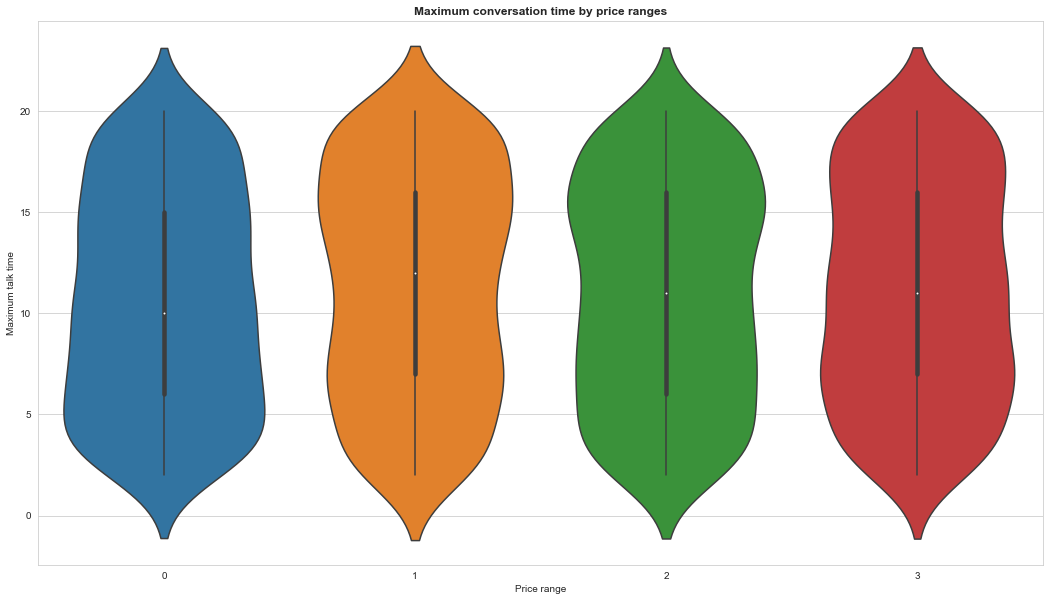

In [35]:
sns.violinplot(phone_data.price_range,phone_data.talk_time)
plt.xlabel('Price range')
plt.ylabel('Maximum talk time')
plt.title('Maximum conversation time by price ranges',loc='center',fontweight='bold') 
plt.show()

**The maximum talk time does not have a significant impact on the price of the phone as there is a similar distribution in each price range.**

### <a id = "R15">PHONE FUNCTIONS RELATED TO CATEGORIAL DATA</a>

In [36]:
# functions necessary for drawing pie charts
def circle_val_out(c):
    help_list = []
    for i,x in enumerate(c):
        help_list.append(c[i][0]+c[i][1])
    return help_list

def circle_val_in(c):
    help_list = []
    for i,x in enumerate(c):
        help_list.append(c[i][0])
        help_list.append(c[i][1])
    return help_list

def label_out(c):
    help_list = []
    for i,x in enumerate(c):
        help_list.append('Price range: '+str(i)+'\n'+str((c[i][0]+c[i][1])))
    return help_list

def label_in(c):
    help_list = []
    for i,x in enumerate(c):
        help_list.append('False\n'+str(round(c[i][0]/(c[i][0]+c[i][1]),2)*100)+'%')
        help_list.append('True\n'+str(round(c[i][1]/(c[i][0]+c[i][1]),2)*100)+'%')
    return help_list

def circleShow(circle_data, title, size):
    fig, ax = plt.subplots(figsize=(size,size))
    size = 0.3
    vals_out = circle_val_out(circle_data)
    vals_in = circle_val_in(circle_data)
    lab_out = label_out(circle_data)
    lab_in = label_in(circle_data)
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(4)*4)
    inner_colors = cmap([1, 2, 5, 6, 9, 10, 13, 14])
    ax.pie(vals_out, 
           radius=1.1,
           labels=lab_out,
           colors=outer_colors,
           labeldistance=.8,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.pie(vals_in, 
           radius=1-size, 
           labels=lab_in, 
           labeldistance=.75,
           colors=inner_colors,
           wedgeprops=dict(width=size, edgecolor='w'))
    ax.set(aspect="equal", title=title)
    return plt.show()

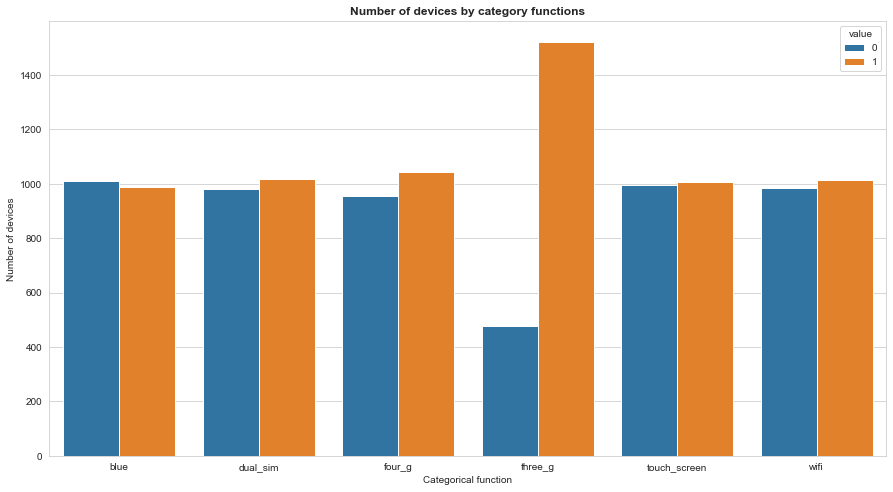

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))  
db = pd.melt(phone_data[bool_data_col])
sns.countplot(data=db,x='variable', hue='value')
plt.xlabel('Categorical function')
plt.ylabel('Number of devices')
plt.title('Number of devices by category functions',loc='center',fontweight='bold') 
plt.show()

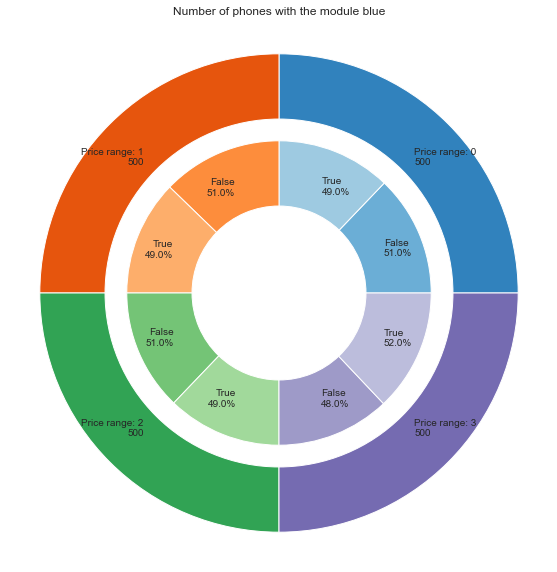

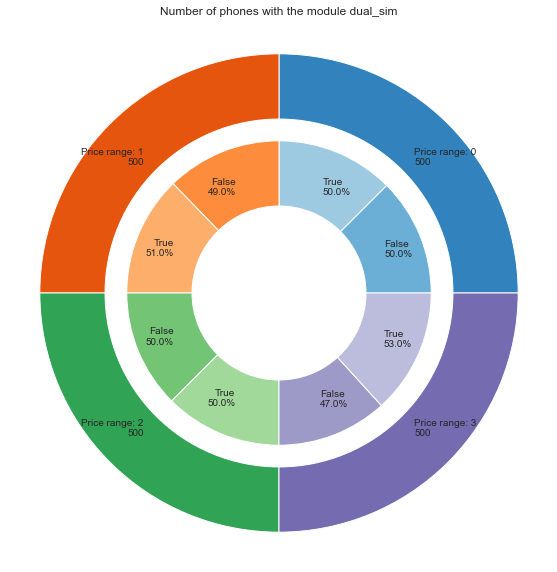

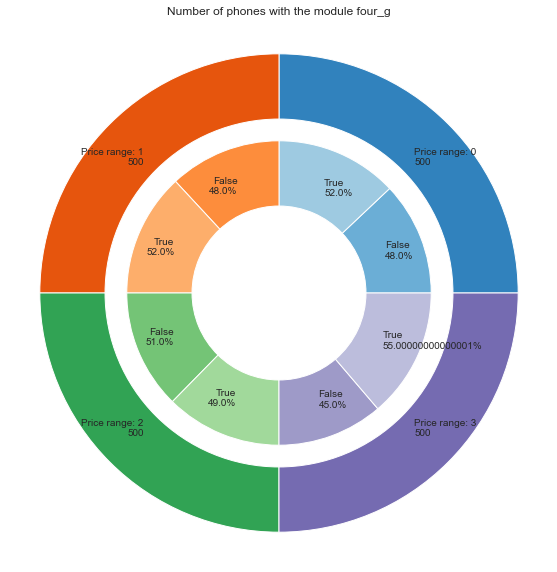

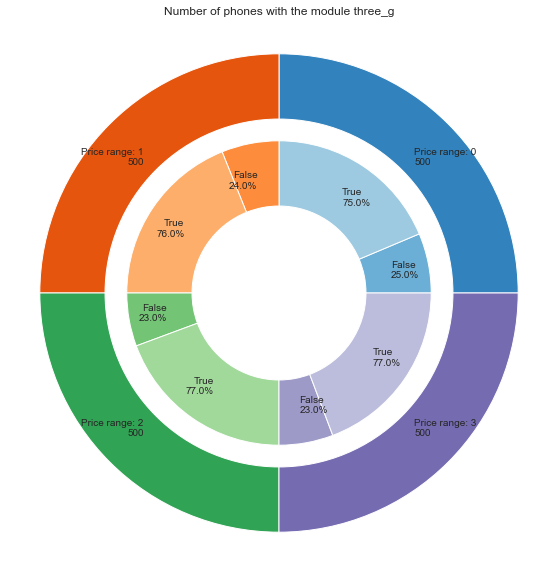

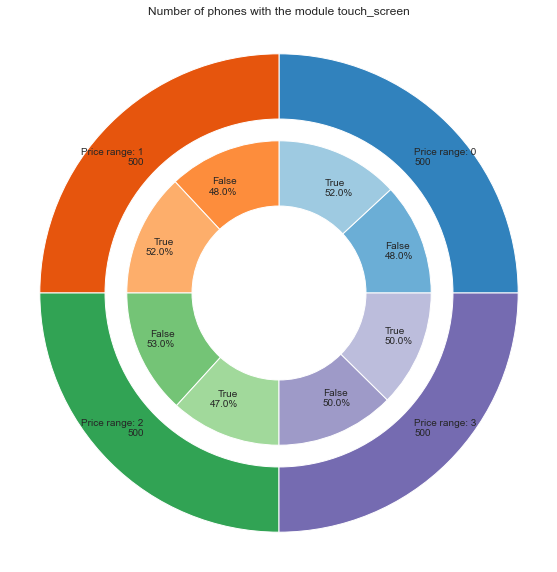

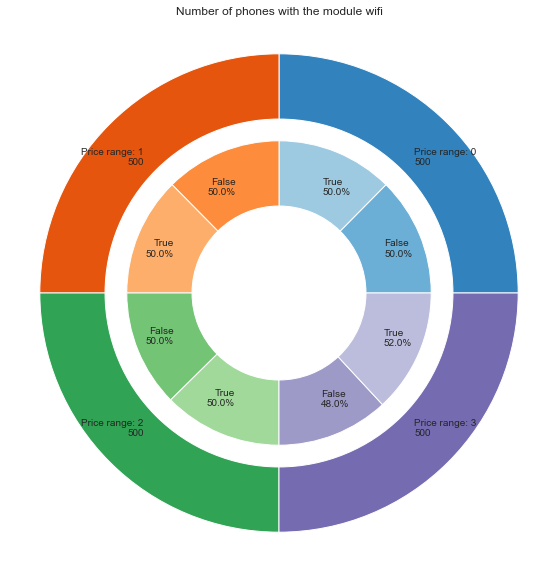

In [38]:
for i,x in enumerate(bool_data_col):
    circleShow(pd.crosstab(phone_data.price_range, phone_data[bool_data_col[i]]).values.tolist(),
               'Number of phones with the module '+bool_data_col[i],10)

**Phone functions marked in categorical data, such as Bluetooth, Wi-Fi, 3G / 4G operation, Dual Sim, touch screen, have no impact on the price, as the number of devices with these functions is similarly distributed in each price range.**

## <a id = "R16">CONCLUSIONS</a>

The collection of available phones has been divided into four price ranges:  
- Price range: 0 - low,
- Price range: 1 - average,
- Price range: 2 - heigh,
- Price range: 3 - very heigh.  

There are 500 devices in each price range.
**The greatest price correlation** of a phone refers to the amount of installed memory **RAM** in the device.  
The larger the RAM, the higher the price. **Other attributes do not have such a big impact on the price of the phone**.  
**Minor** price of the device is also affected by the amount of total **battery power**.  
Half of the phones from the 3rd price range have twice the battery capacity of the phones from the 0th price range.

It is difficult to state the actual impact of the screen resolution on the price of the phone, because the technical specifications for 180 phones include zero screen widths and very different values for the vertical and horizontal resolution of the matrix screen.  
<u>This may have an impact on the proper assessment of the correlation of this item with the price of the device </u>.  
The analysis of display screen sizes confirms the above conclusions, because of the 2000 analyzed devices, as many as 1108, i.e. 55.4% according to the data given in the specification, have a size above 7", which should include these devices as tablets. 44.6% have a screen size below 7 ", which in turn allows the device to qualify as a smartphone or telephone.
The resolution of the primary and front camera, internal memory size, processor speed, number of processor cores, weight, thickness and maximum phone operating time during a call do not have a significant impact on the price of the phone, as they have similar distributions in each price range.

Phone functions marked in categorical data, such as Bluetooth, Wi-Fi, 3G / 4G, Dual Sim, touch screen, do not affect the price of the device, because the number of devices with these functions is similarly distributed in each price range.